## Imports

In [6]:
import pandas as pd # data processing, CSV file I/O
import matplotlib.pyplot as plt # data visualization
import matplotlib.cm as cm # Creating color bar
import matplotlib.colors as mcolors # Creating color bar
import seaborn as sns # data visualization
import folium
from folium.plugins import HeatMap, HeatMapWithTime
import warnings # ignore warnings
warnings.filterwarnings('ignore', category=FutureWarning)
import calplot
import numpy as np; np.random.seed(sum(map(ord, 'calplot')))
import scipy.stats as stats

## Loading data

In [7]:
# Specify the full path to the CSV file
file_path = r"C:\Users\poltr\OneDrive - udl.cat\Desktop\Police_Department_Incident_Reports_Historical_2003_to_Feb_2025_20250204.csv"
# file_path = r"C:/Users/clara/OneDrive/Skrivebord/DTU/Human Centeret Artificial Intelligence/2. semester/02806_Social_Data_Analysis_and_Visualization/Police_Department_Incident_Reports_Historical_2003_to_Feb_2025_20250204.csv"
#file_path = r"C:\Users\Bruger\OneDrive - Danmarks Tekniske Universitet\Kandidat\Social Data Analysis and Visualization\Police_Department_Incident_Reports_Historical_2003_to_Feb_2025_20250204.csv"

# Read data from the specified file
df = pd.read_csv(file_path)

# Preview the first 5 lines of the loaded data
df.head()

,Category,PdDistrict,Longitude,Latitude,TimeOfDay,DayOfWeek,DayOfMonth,Month,Year
0,ROBBERY,INGLESIDE,-122.420084,37.708311,17,Monday,22,November,2004
1,VEHICLE THEFT,PARK,-120.500000,90.000000,20,Tuesday,18,October,2005
2,VEHICLE THEFT,SOUTHERN,-120.500000,90.000000,2,Sunday,15,February,2004
3,ASSAULT,SOUTHERN,-122.410541,37.770913,17,Sunday,21,November,2010
4,ASSAULT,TARAVAL,-122.470366,37.745158,15,Tuesday,2,April,2013


### Creating heatmap

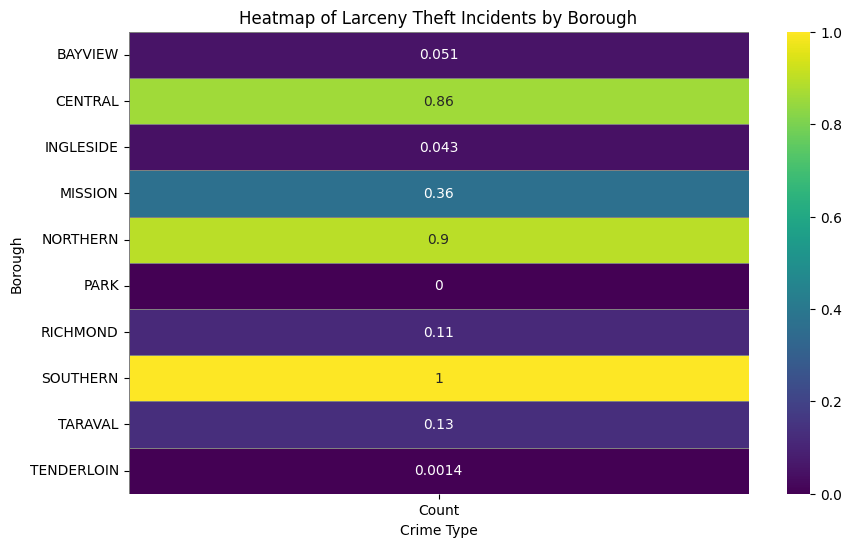

In [8]:
# Preview the first 5 lines of the loaded data
focuscrimes = set(['ROBBERY', 'VEHICLE THEFT', 'ASSAULT', 'BURGLARY', 'LARCENY/THEFT', 'DRUG/NARCOTIC', 'VANDALISM', 'WEAPON LAWS', 'PROSTITUTION', 'STOLEN PROPERTY'])

# Filter data for "Larceny Theft"
df_larceny = df[df['Category'] == 'LARCENY/THEFT']

# Group by the desired geographic unit (e.g., 'PdDistrict') and count occurrences
heatmap_data = df_larceny.groupby('PdDistrict').size().reset_index(name='Count')

# Set index for heatmap
heatmap_data.set_index('PdDistrict', inplace=True)

# Normalize data
normalized_data = (heatmap_data - heatmap_data.min()) / (heatmap_data.max() - heatmap_data.min())

# Create heatmap
plt.figure(figsize=(10, 6))
cmap = sns.color_palette("viridis", as_cmap=True)
sns.heatmap(normalized_data, annot=True, cmap=cmap, linewidths=0.5, linecolor='gray')

# Titles and labels
plt.title("Heatmap of Larceny Theft Incidents by Borough")
plt.xlabel("Crime Type")
plt.ylabel("Borough")

# Show plot
plt.show()


In [ ]:
import os

# Ensure the directory "figures" exists
output_dir = os.path.join(os.getcwd(), "../figures")
os.makedirs(output_dir, exist_ok=True)

# Save the image in the folder "figures"
plt.savefig(os.path.join(output_dir, "heatmap.png"), dpi=300, bbox_inches='tight')

<Figure size 640x480 with 0 Axes>